# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [5]:
y_train[333]

8

Check the actual image

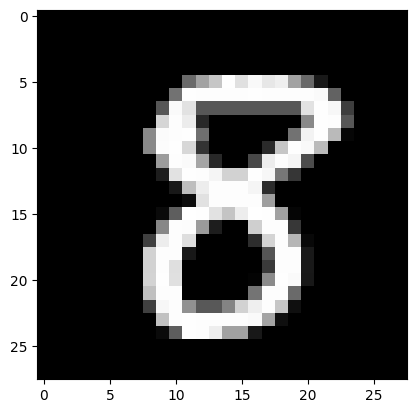

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [10]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

c:\Users\Nil\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30


469/469 [==============================] - 4s 5ms/step - loss: 0.5128 - accuracy: 0.8479 - val_loss: 0.2082 - val_accuracy: 0.9382
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2480 - accuracy: 0.9276 - val_loss: 0.1579 - val_accuracy: 0.9522
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1983 - accuracy: 0.9416 - val_loss: 0.1313 - val_accuracy: 0.9604
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1712 - accuracy: 0.9490 - val_loss: 0.1219 - val_accuracy: 0.9636
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1536 - accuracy: 0.9549 - val_loss: 0.1102 - val_accuracy: 0.9681
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1444 - accuracy: 0.9570 - val_loss: 0.1061 - val_accuracy: 0.9700
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1308 - accuracy: 0.9613 - val_loss: 0.0982 - val_accuracy: 0.9706
Epoch 8/30
469/46

Use Keras evaluate function to evaluate performance on the test set

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1159689798951149
Test accuracy: 0.9743000268936157


Interpret the result

#type your answer here

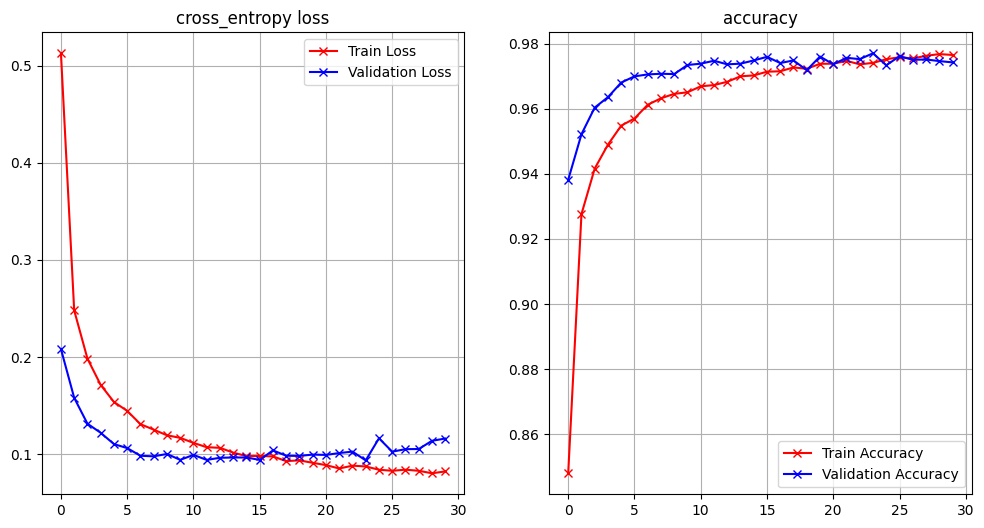

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [15]:
import pandas as pd
import numpy as np

In [16]:
## Mount the dataset

df = pd.read_csv('data/apple_quality.csv',
                 skipinitialspace=True)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [17]:
df.shape

(4001, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


We can see that the data is an object tyoe of data, but computers can only read numerical type of data, therefore it must be converted all into a numerical type

In [19]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
for items in df.columns[:-1]:
    df[items] = df[items].astype('float64')

Since we only have a few null values we can just drop them all

In [22]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [23]:
## One-hot encode the label
dummies = pd.get_dummies(df["Quality"])

In [24]:
dummies

,bad,good
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
3995,True,False
3996,False,True
3997,True,False
3998,False,True


In [25]:
## Split the dataset 
X = df.drop(columns='Quality', axis=1).values
y = dummies

In [26]:
## Normalize values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=True, random_state=42, test_size=0.2)

In [28]:
## Create the Network
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(8,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(2, activation='sigmoid'))

In [29]:
## Summary of the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               3600      
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 602       
                                                                 
Total params: 124,502
Trainable params: 124,502
Non-trainable params: 0
_________________________________________________________________


The previous model has

In [30]:
## 1st model
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
 
history_1 = model_1.fit(
    X_train, y_train,
    batch_size = 128,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/20


25/25 [==============================] - 1s 18ms/step - loss: 0.4699 - accuracy: 0.7750 - val_loss: 0.3642 - val_accuracy: 0.8487
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.3714 - accuracy: 0.8216 - val_loss: 0.3194 - val_accuracy: 0.8725
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3447 - accuracy: 0.8388 - val_loss: 0.3049 - val_accuracy: 0.8825
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3208 - accuracy: 0.8544 - val_loss: 0.2930 - val_accuracy: 0.8850
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3151 - accuracy: 0.8553 - val_loss: 0.2892 - val_accuracy: 0.8775
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3047 - accuracy: 0.8631 - val_loss: 0.2895 - val_accuracy: 0.8925
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2963 - accuracy: 0.8647 - val_loss: 0.2842 - val_accuracy: 0.8900
Epoch 8/20
25/25 [===========

In [31]:
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.24591781198978424
Test accuracy: 0.9100000262260437


In [32]:
## 2nd model
from keras import regularizers

model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(8,), 
          kernel_regularizer=regularizers.l2(0.001)),
    Dense(300, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dense(2, activation='sigmoid')
])

In [33]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               3600      
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dense_8 (Dense)             (None, 2)                 602       
                                                                 
Total params: 124,502
Trainable params: 124,502
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

 
history_2 = model_2.fit(
    X_train, y_train,
    batch_size = 128,
    epochs=95,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/95


25/25 [==============================] - 1s 11ms/step - loss: 0.7268 - accuracy: 0.8044 - val_loss: 0.6114 - val_accuracy: 0.8512
Epoch 2/95
25/25 [==============================] - 0s 7ms/step - loss: 0.5557 - accuracy: 0.8581 - val_loss: 0.5096 - val_accuracy: 0.8725
Epoch 3/95
25/25 [==============================] - 0s 6ms/step - loss: 0.4822 - accuracy: 0.8672 - val_loss: 0.4506 - val_accuracy: 0.8988
Epoch 4/95
25/25 [==============================] - 0s 6ms/step - loss: 0.4337 - accuracy: 0.8788 - val_loss: 0.4216 - val_accuracy: 0.8963
Epoch 5/95
25/25 [==============================] - 0s 7ms/step - loss: 0.4044 - accuracy: 0.8784 - val_loss: 0.4177 - val_accuracy: 0.8775
Epoch 6/95
25/25 [==============================] - 0s 5ms/step - loss: 0.3813 - accuracy: 0.8863 - val_loss: 0.3962 - val_accuracy: 0.8925
Epoch 7/95
25/25 [==============================] - 0s 5ms/step - loss: 0.3674 - accuracy: 0.8888 - val_loss: 0.3793 - val_accuracy: 0.8788
Epoch 8/95
25/25 [============

In [35]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.17848524451255798
Test accuracy: 0.9587500095367432


#### Conclusion

#type your answer here